In [37]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sn

In [2]:
# Load MNIST dataset, X is the images array, Y the labels array
X, Y = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 

In [3]:
# Keep 21000 data for the training
training_data = X[:21000]
training_target = Y[:21000]

# Other data are used for the test
test_data = X[9000:]
test_target = Y[9000:]

In [39]:
clf_type = ['poly', 'rbf', 'sigmoid', 'linear']
C_value = np.linspace(.1, 1, 5)
time_list, accuracy_list, recall_list, matrix_list = [], [], [], []

for clf in clf_type:
    
    start = time.time()
    Y_accuracy = []
    Y_recall = []
    Y_matrix = []
    for C in C_value:
        
        clsvm = SVC(C = C, kernel=clf)
        Classifier = clsvm.fit(training_data, training_target)
        prediction = Classifier.predict(test_data)
        
        accuracy = precision_score(test_target, prediction, average="micro")
        recall = recall_score(test_target, prediction, average='macro')
        matrix = metrics.confusion_matrix(test_target, prediction)
        
        Y_accuracy.append(accuracy)
        Y_recall.append(recall)
        Y_matrix.append(matrix)
        
    time_list.append(time.time() - start)
    accuracy_list.append(Y_accuracy)
    recall_list.append(Y_recall)
    matrix_list.append(Y_matrix)
    

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

<Figure size 432x288 with 0 Axes>

In [2]:
#  Bar plot
plt.bar(clf_type, time_list, color =['r', 'g', 'b', 'o'],
        width = 0.5)
plt.xlabel("Type de classifier")
plt.ylabel("Temps en secondes")
plt.title("Temps en secondes de l'exécution des différentes méthodes")
plt.show()

temps_total = sum(time_list)

print(f"Le temps total d'exécution est de {temps_total} secondes, soit {temps_total / 60} minutes")

NameError: name 'plt' is not defined

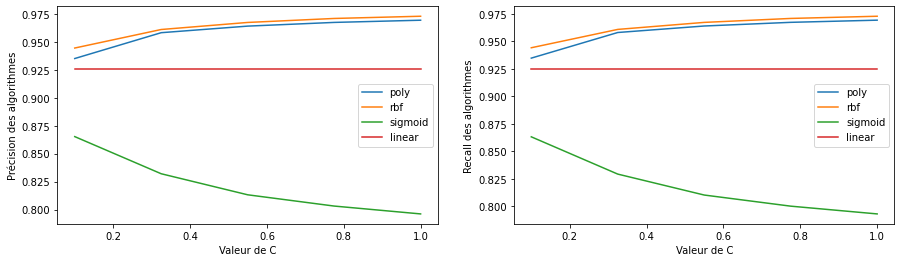

In [55]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
for i in range(len(accuracy_list)):
    plt.plot(C_value, accuracy_list[i], label = clf_type[i])
plt.xlabel("Valeur de C")
plt.ylabel("Précision des algorithmes")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(recall_list)):
    plt.plot(C_value, recall_list[i], label = clf_type[i])
plt.xlabel("Valeur de C")
plt.ylabel("Recall des algorithmes")
plt.legend()

plt.show()

In [5]:
clsvm = SVC(kernel='precomputed', verbose=True)
Classifier = clsvm.fit(precomputed_training_data, training_target)
accuracy = precision_score(test_target, Classifier.predict(test_data), average="micro")
print(f"Accuracy with precomputed kernel = {accuracy}")

[LibSVM]

ValueError: X has 784 features, but SVC is expecting 21000 features as input.

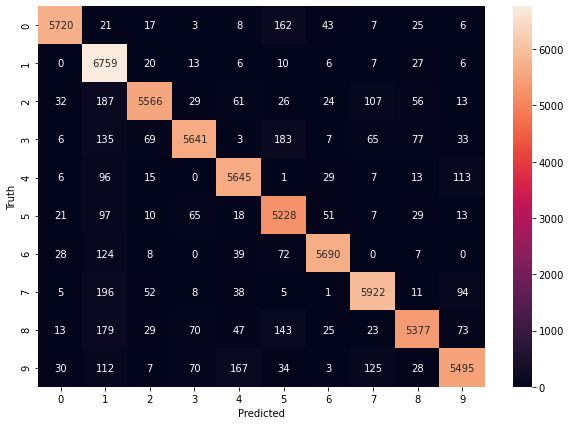

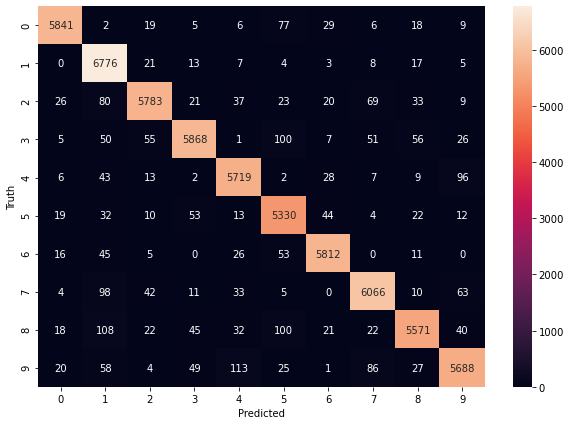

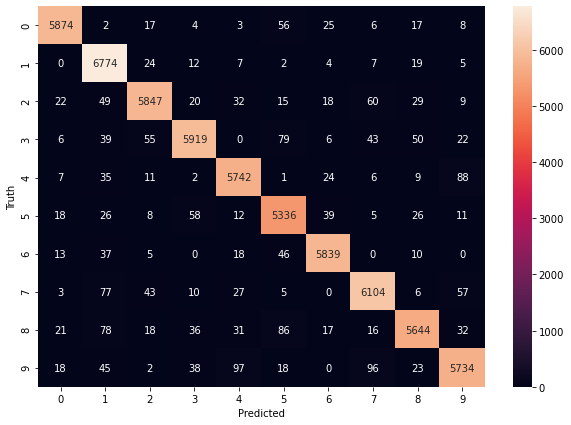

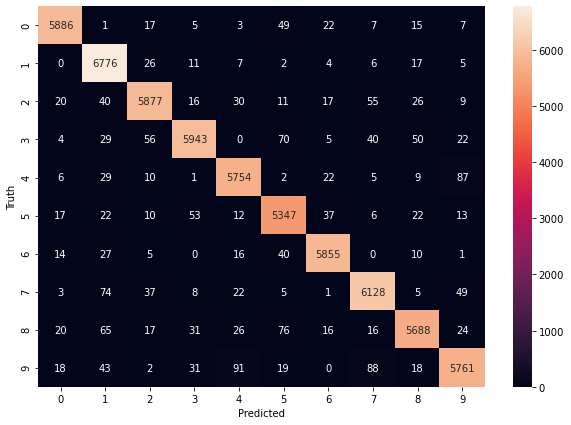

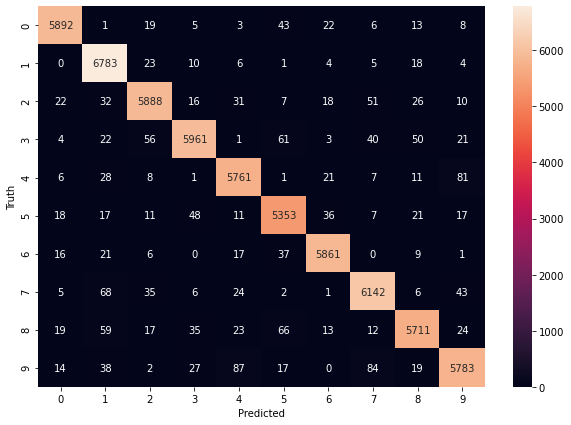

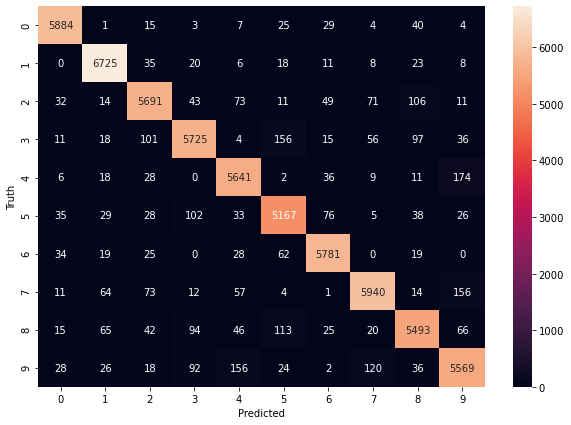

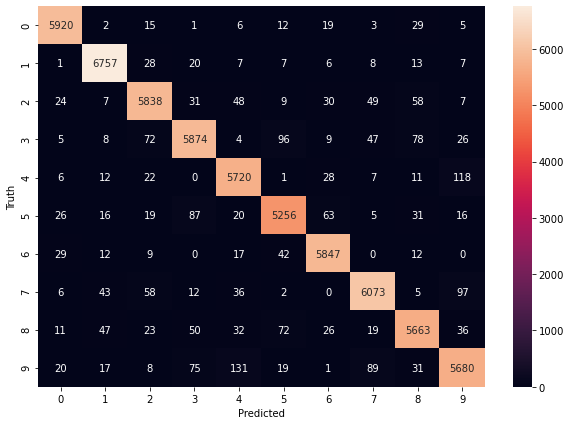

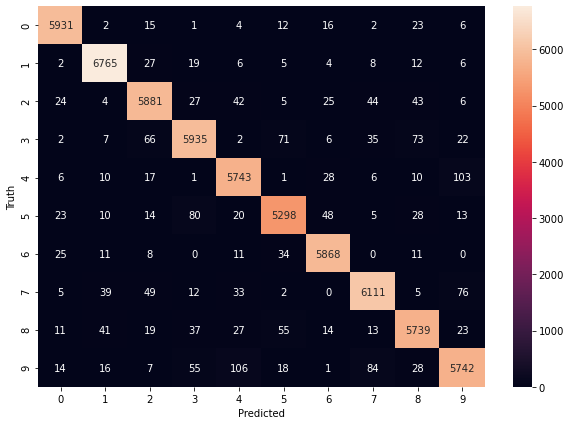

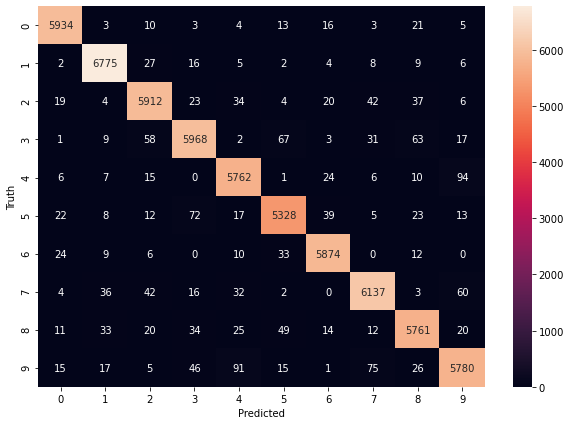

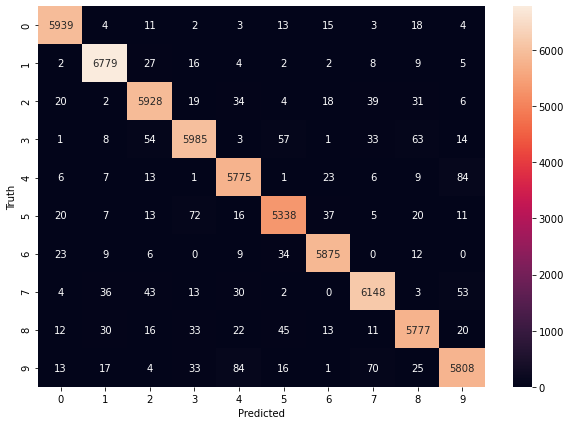

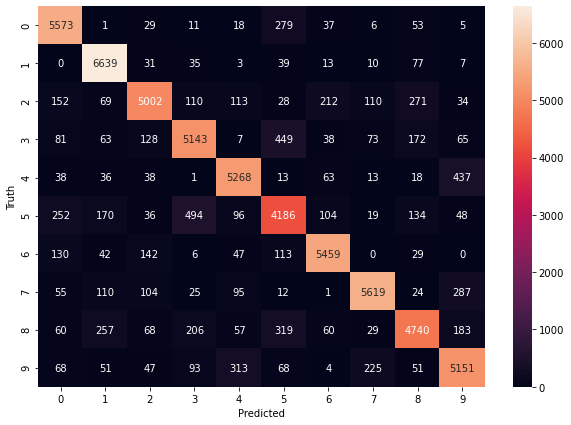

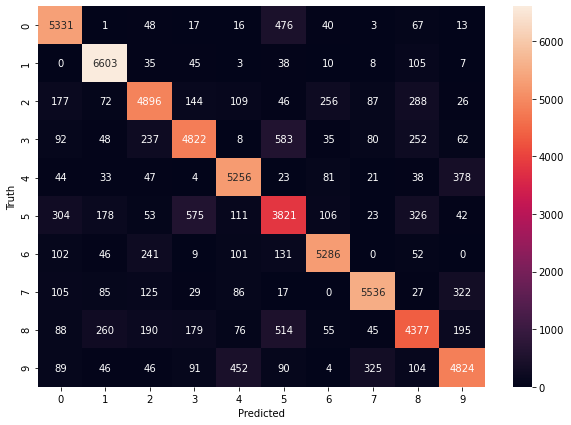

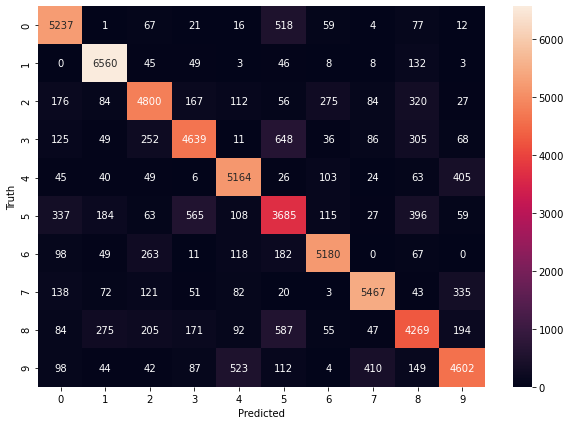

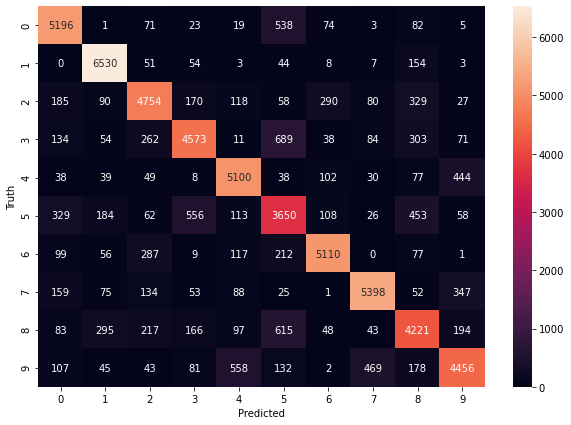

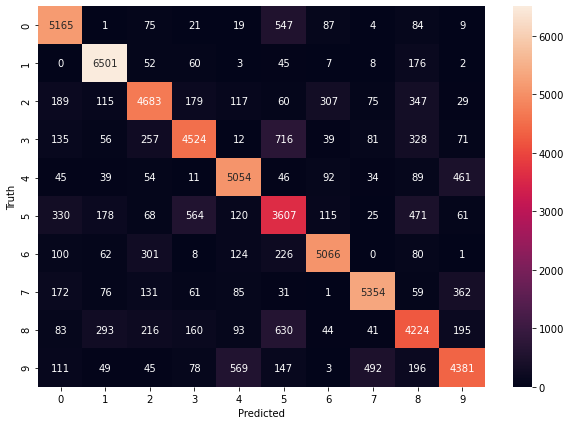

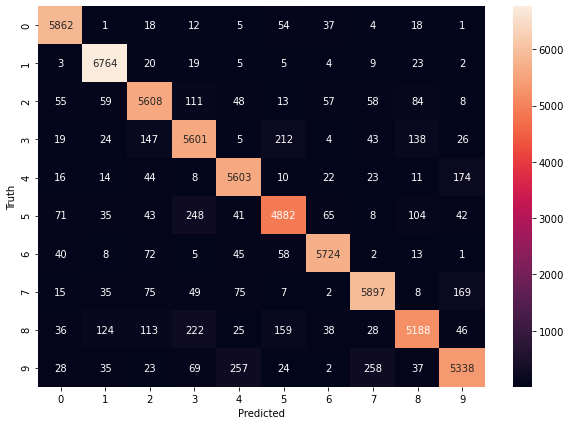

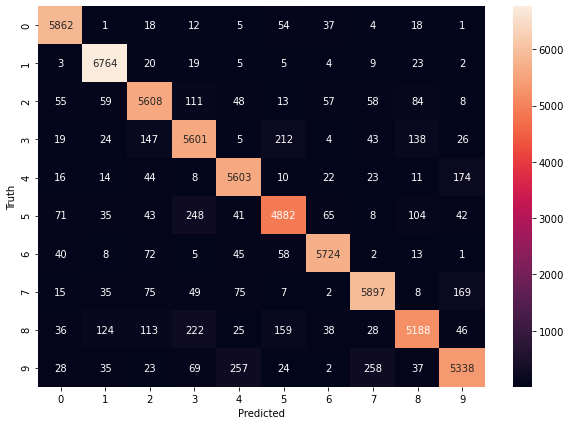

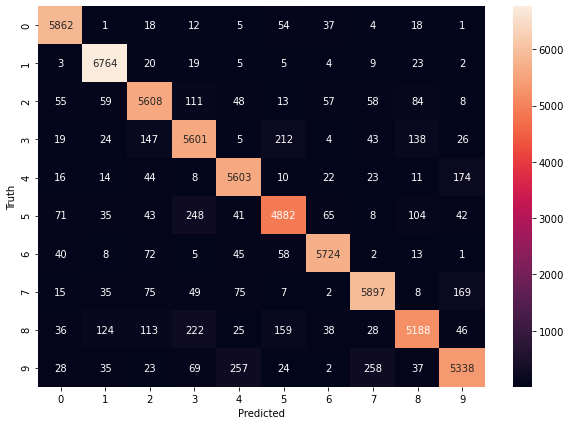

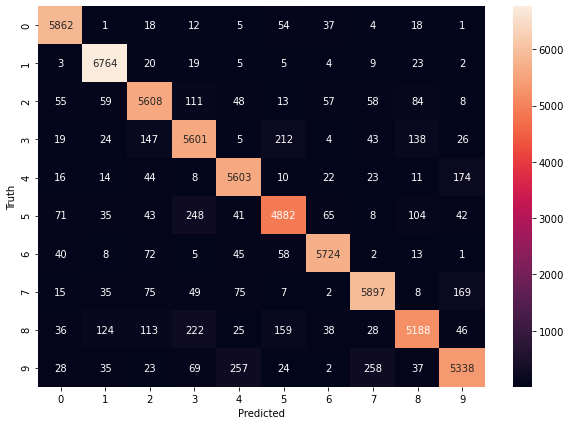

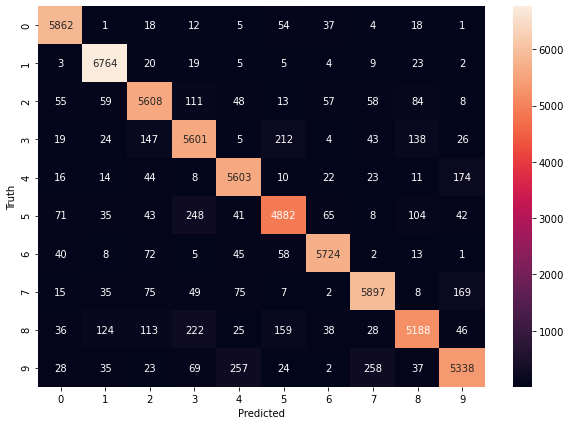

In [41]:
for submatrix in matrix_list:
    for matrix in submatrix:
        plt.figure(figsize = (10,7))
        sn.heatmap(matrix, annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()